# 0. Preâmbulo 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from statsforecast import StatsForecast
from statsforecast.models import (SeasonalNaive, AutoARIMA, AutoETS, Naive)
from datasetsforecast.losses import (mae, mape, mse, mase, rmse, smape)
from tqdm.autonotebook import tqdm

c:\Users\Maria Inês\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


# 1. Importação dos dados intermédios

In [3]:
df_grouped = pd.read_csv('Dados_intermedios/df_nb1.csv')
df_grouped = df_grouped.set_index('index')
df_grouped.columns

Index(['6.1.1 - De aplicação tópica'], dtype='object')

# 2. Pré-processamento das séries temporais


In [4]:
Y_df = (df_grouped
        .reset_index()
        .rename(columns={'index':'ds', 
                         '6.1.1 - De aplicação tópica':'De aplicação tópica'}) 
        )
Y_df.columns.name = None
Y_df = pd.melt(Y_df, id_vars=['ds'])
Y_df = (Y_df
        .rename(columns={'variable':'unique_id', 
                            'value':'y'})
        .filter(['unique_id', 'ds', 'y'])
        )

Y_df['ds'] = pd.to_datetime(Y_df['ds'])
Y_df

,unique_id,ds,y
0,De aplicação tópica,2013-01-01,1022.78
1,De aplicação tópica,2013-02-01,942.22
2,De aplicação tópica,2013-03-01,1152.90
3,De aplicação tópica,2013-04-01,678.64
4,De aplicação tópica,2013-05-01,814.43
...,...,...,...
118,De aplicação tópica,2022-11-01,1299.99
119,De aplicação tópica,2022-12-01,1570.21
120,De aplicação tópica,2023-01-01,1230.60
121,De aplicação tópica,2023-02-01,747.74


In [5]:
print(Y_df.dtypes)

unique_id            object
ds           datetime64[ns]
y                   float64
dtype: object


In [6]:
# Substituir NaN por 0
Y_df = Y_df.fillna(0)

In [7]:
# mudar os nomes das colunas
df = Y_df[Y_df['unique_id'].isin(['De aplicação tópica'])]

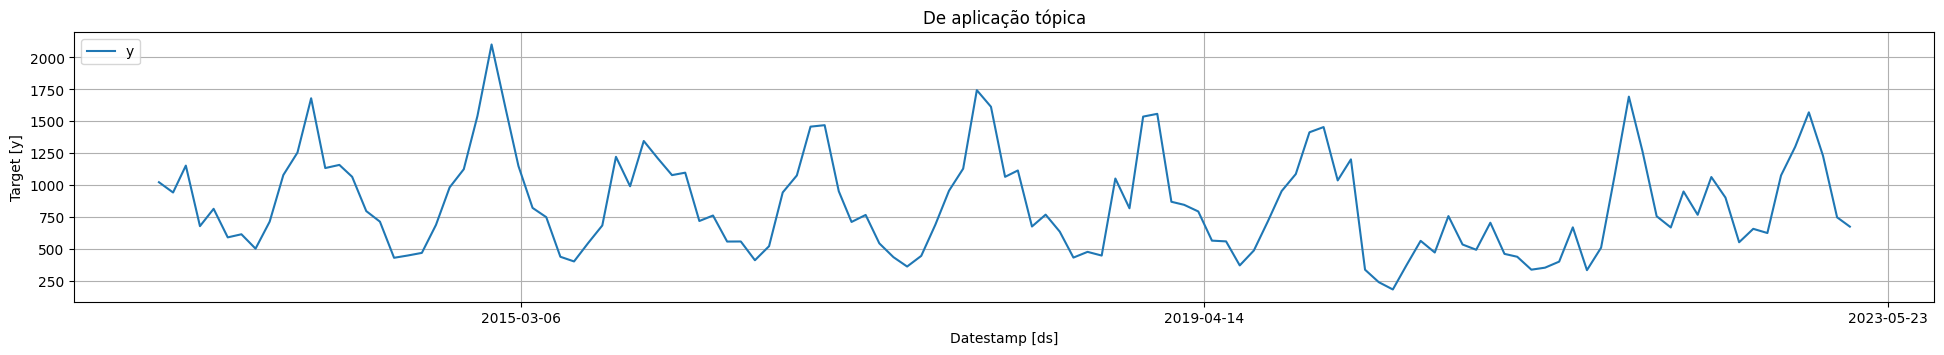

In [8]:
StatsForecast.plot(df)

# 3. Lista de modelos a testar

In [9]:
model_list = [
            Naive(),
            SeasonalNaive(season_length=12),
            AutoETS(season_length=12),
            AutoARIMA(season_length=12),
            AutoARIMA(d=0, season_length=12, alias='ARIMA_D0'), 
            AutoARIMA(d=1, season_length=12, alias='ARIMA_D1')
            ]

sf = StatsForecast(df=Y_df, 
                   models=model_list, 
                   freq='M',
                   n_jobs=-1,
                   fallback_model = SeasonalNaive(season_length=12))


# 4. Avaliação da performance

In [10]:
crossvalidation_df = sf.cross_validation(
    df = df,
    h = 1,
    step_size = 1,
    n_windows = 24
  )

crossvalidation_df

,ds,cutoff,y,Naive,SeasonalNaive,AutoETS,AutoARIMA,ARIMA_D0,ARIMA_D1
unique_id,,,,,,,,,
De aplicação tópica,2021-03-31,2021-02-28,337.570007,438.760010,337.350006,372.243378,64.710831,340.110443,64.710831
De aplicação tópica,2021-04-30,2021-03-31,353.299988,337.570007,239.979996,333.656921,189.742676,331.453247,189.742676
De aplicação tópica,2021-05-31,2021-04-30,400.589996,353.299988,182.490005,253.379791,384.657257,384.657257,160.016571
De aplicação tópica,2021-06-30,2021-05-31,669.169983,400.589996,372.769989,266.781616,324.197815,324.197815,153.306244
De aplicação tópica,2021-07-31,2021-06-30,333.779999,669.169983,563.460022,357.926056,677.295898,677.295898,519.427429
De aplicação tópica,2021-08-31,2021-07-31,509.769989,333.779999,472.250000,441.277161,487.310242,487.310242,374.459869
De aplicação tópica,2021-09-30,2021-08-31,1079.180054,509.769989,757.479980,721.036255,885.306030,885.306030,780.118225
De aplicação tópica,2021-10-31,2021-09-30,1693.300049,1079.180054,534.700012,782.520142,1050.723877,1050.723877,863.066956
De aplicação tópica,2021-11-30,2021-10-31,1263.489990,1693.300049,493.549988,1219.653931,1634.127197,1634.127197,1769.484619


### 4.1 Medidas de Exatidão


### 4.1.1. De aplicação tópica

In [11]:
ts = crossvalidation_df.query('unique_id == "De aplicação tópica"').reset_index()['y']
f1 = crossvalidation_df.query('unique_id == "De aplicação tópica"').reset_index()['SeasonalNaive']
f2 = crossvalidation_df.query('unique_id == "De aplicação tópica"').reset_index()['AutoETS']
f3 = crossvalidation_df.query('unique_id == "De aplicação tópica"').reset_index()['AutoARIMA']
f4 = crossvalidation_df.query('unique_id == "De aplicação tópica"').reset_index()['ARIMA_D0']
f5 = crossvalidation_df.query('unique_id == "De aplicação tópica"').reset_index()['ARIMA_D1']

eval = pd.DataFrame({
    'rmse': [rmse(ts, f1), rmse(ts, f2), rmse(ts, f3), rmse(ts, f4), rmse(ts, f5)],
    'mae': [mae(ts, f1), mae(ts, f2), mae(ts, f3), mae(ts, f4), mae(ts, f5)],
    'mape': [mape(ts, f1), mape(ts, f2), mape(ts, f3), mape(ts, f4), mape(ts, f5)],
}, index=crossvalidation_df.columns[4:])
eval

,rmse,mae,mape
SeasonalNaive,417.157257,318.512085,36.040059
AutoETS,317.578705,234.189529,27.143046
AutoARIMA,268.826904,217.308838,29.558539
ARIMA_D0,260.904694,200.140945,24.550690
ARIMA_D1,323.599182,265.870270,35.783803


In [12]:
crossvalidation_df.to_csv('crossvalidationDGR.csv')

## 4.2. Ajustar o modelo

### 4.2.1. AutoARIMA_D0

#### 4.2.1.1. De aplicação tópica

In [13]:
model_list_AutoARIMA0 = [AutoARIMA(d=0, season_length=12, alias='ARIMA_D0')]

sf = StatsForecast(df=Y_df.query('unique_id == "De aplicação tópica"'), 
                   models=model_list_AutoARIMA0, 
                   freq='M',
                   n_jobs=-1)

In [14]:
df_aux = Y_df.query('unique_id == "De aplicação tópica"').reset_index(drop=True)
forecasts_df = sf.forecast(df=df_aux, h=1, level=[95,80])

df_faux = forecasts_df.reset_index()
df_faux.ds = df_faux.ds + pd.offsets.MonthBegin()

df_aux_all = pd.concat([df_aux,df_faux])

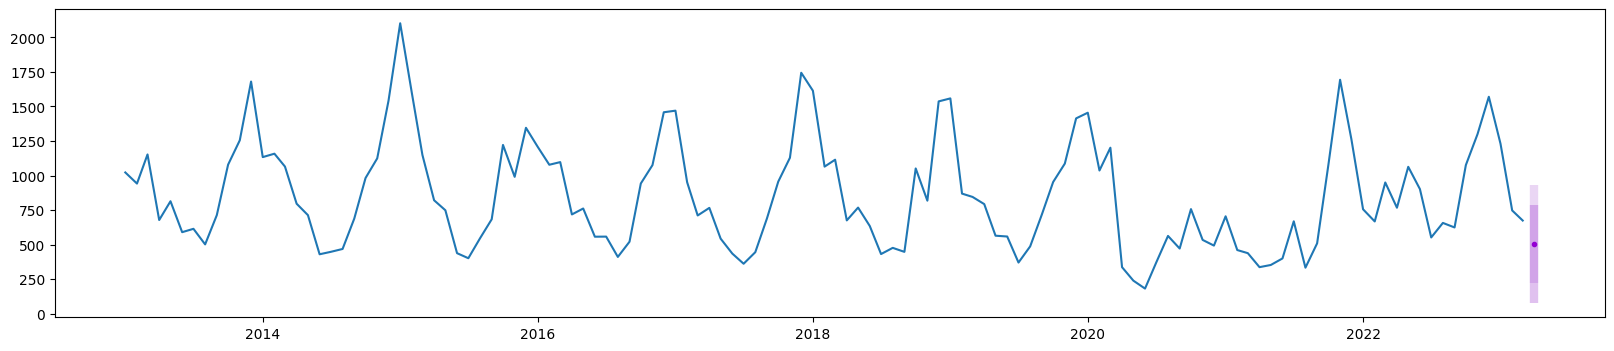

In [15]:
df_y = df_aux_all.set_index('ds').filter(['y'])
df_f = df_aux_all.set_index('ds').iloc[:,[2]]
lo_80 = df_aux_all.iloc[-1,4]
hi_80 = df_aux_all.iloc[-1,6]
lo_95 = df_aux_all.iloc[-1,5]
hi_95 = df_aux_all.iloc[-1,7]

fig, ax = plt.subplots(1,1, figsize=(20,4))
ax.plot(df_y)
ax.plot(df_f, marker='.', color='darkviolet')
ax.fill_between(x=df_f.index[-1:], y1=lo_80, y2=hi_80, color='darkorchid', alpha=0.3, linewidth=6)
ax.fill_between(x=df_f.index[-1:], y1=lo_95, y2=hi_95, color='darkorchid', alpha=0.2, linewidth=6)
plt.show()